In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf

In [2]:
tickers = ['TCS.NS','RELIANCE.NS','SBIN.NS']
data = yf.download(tickers , start = '2024-01-01', end = '2024-12-31')['Close']
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Ticker,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,
2024-01-01,1290.744263,618.355835,3748.030273
2024-01-02,1301.432983,616.523926,3720.591797
2024-01-03,1287.281006,620.380554,3630.655029
2024-01-04,1293.933350,619.705627,3606.118164
2024-01-05,1299.439697,618.934326,3676.041748
...,...,...,...
2024-12-23,1222.300049,804.986267,4148.414062
2024-12-24,1222.750000,796.065369,4169.563477
2024-12-26,1216.550049,796.457520,4159.188477


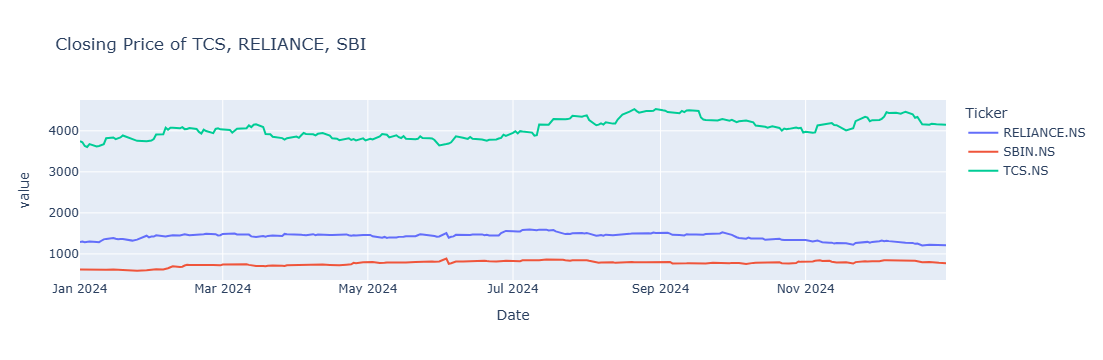

In [10]:
px.line(data, title = "Closing Price of TCS, RELIANCE, SBI")

In [11]:
simple_returns = data.pct_change()
simple_returns = simple_returns.dropna()
simple_returns

Ticker,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,
2024-01-02,0.008281,-0.002963,-0.007321
2024-01-03,-0.010874,0.006255,-0.024173
2024-01-04,0.005168,-0.001088,-0.006758
2024-01-05,0.004256,-0.001245,0.019390
2024-01-08,-0.007804,-0.023288,-0.015945
...,...,...,...
2024-12-23,0.014104,0.011268,-0.002877
2024-12-24,0.000368,-0.011082,0.005098
2024-12-26,-0.005070,0.000493,-0.002488


In [12]:
log_returns = np.log(data/data.shift(1))
log_returns = log_returns.dropna()
log_returns

Ticker,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,
2024-01-02,0.008247,-0.002967,-0.007348
2024-01-03,-0.010934,0.006236,-0.024470
2024-01-04,0.005154,-0.001089,-0.006781
2024-01-05,0.004246,-0.001245,0.019205
2024-01-08,-0.007834,-0.023564,-0.016073
...,...,...,...
2024-12-23,0.014006,0.011205,-0.002882
2024-12-24,0.000368,-0.011144,0.005085
2024-12-26,-0.005083,0.000492,-0.002491


In [13]:
weights = np.array([1/3,1/3,1/3])
portfolio_simple_returns = simple_returns.dot(weights)
portfolio_simple_returns

Date
2024-01-02   -0.000667
2024-01-03   -0.009597
2024-01-04   -0.000893
2024-01-05    0.007467
2024-01-08   -0.015679
                ...   
2024-12-23    0.007498
2024-12-24   -0.001872
2024-12-26   -0.002355
2024-12-27   -0.004358
2024-12-30   -0.008041
Length: 244, dtype: float64

In [14]:
weights = np.array([1/3, 1/3, 1/3])
portfolio_log_returns = log_returns.dot(weights)
portfolio_log_returns

Date
2024-01-02   -0.000689
2024-01-03   -0.009722
2024-01-04   -0.000905
2024-01-05    0.007402
2024-01-08   -0.015824
                ...   
2024-12-23    0.007443
2024-12-24   -0.001897
2024-12-26   -0.002361
2024-12-27   -0.004403
2024-12-30   -0.008087
Length: 244, dtype: float64

In [15]:
annualized_simple_return = ((1 + portfolio_simple_returns.mean()) ** 252) - 1
annualized_simple_return

0.12802148284681314

In [16]:
annualized_log_return = portfolio_log_returns.mean() * 252
annualized_log_return

0.08969048204252032

In [17]:
daily_volatility = np.std(portfolio_simple_returns)
annual_volatility = daily_volatility * np.sqrt(252)
annual_volatility

0.18421327449040528

In [18]:
benchmark = yf.download('^NSEI', start = '2024-01-01', end = '2024-12-31')['Close']
benchmark = benchmark.pct_change() # Simple Returns for my S&P 500
benchmark = benchmark.dropna()
benchmark

[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2024-01-02,-0.003500
2024-01-03,-0.006852
2024-01-04,0.006564
2024-01-05,0.002410
2024-01-08,-0.009111
...,...
2024-12-23,0.007035
2024-12-24,-0.001086
2024-12-26,0.000950


In [19]:
portfolio_returns = portfolio_simple_returns.to_numpy().flatten()
benchmark_return = benchmark.to_numpy().flatten()

cov_matrix = np.cov(portfolio_returns, benchmark_return)
beta = cov_matrix[0,1]/cov_matrix[1,1]
beta

1.0996169222898509

In [20]:
risk_free_rate = 0.07
alpha = (np.mean(portfolio_simple_returns) - risk_free_rate/252) - beta * (np.mean(benchmark) - risk_free_rate/252)
alpha = alpha * 252
alpha

0.02117766480313578

In [22]:
sharpe_ratio = (annualized_simple_return - risk_free_rate)/annual_volatility
sharpe_ratio

0.31496906510847117

In [23]:
negative_returns = portfolio_simple_returns[portfolio_simple_returns < 0]
downside_deviation = np.std(negative_returns) # Daily Downside Std Dev
downside_deviation = downside_deviation * np.sqrt(252) # Annualized Downside Std Dev
downside_deviation

0.1337641298613198

In [24]:
sortino_ratio = (annualized_simple_return - risk_free_rate)/downside_deviation
sortino_ratio

0.4337596552002918

In [25]:
cumulative_simple_returns = (1 + portfolio_simple_returns).cumprod() 
max_drawdown = ((cumulative_simple_returns.cummax() - cumulative_simple_returns)/cumulative_simple_returns.cummax()).max()
max_drawdown

0.13504625003232285

In [26]:
calmar_ratio = annualized_simple_return/max_drawdown
calmar_ratio

0.9479825083345272

In [27]:
treynor_ratio = (annualized_simple_return - risk_free_rate)/beta
treynor_ratio

0.05276517819131843

In [34]:
portfolio_value = 1000000
var_90 = np.percentile(portfolio_simple_returns, 10) * portfolio_value
var_95 = np.percentile(portfolio_simple_returns, 5) * portfolio_value
var_99 = np.percentile(portfolio_simple_returns, 1) * portfolio_value

In [30]:
var_90

-10290.416761246383

In [31]:
var_95

-16790.983106855663

In [35]:
var_99

-26261.62149096534

In [36]:
c_var = portfolio_simple_returns[portfolio_simple_returns <= np.percentile(portfolio_simple_returns, 5)].mean()
c_var = c_var * portfolio_value
c_var

-25637.037734179554